# 클러스터링이란?
- 유사한 데이터들을 같은 클러스터(집단)로 묶어 주는 작업을 클러스터링이라고 합니다. 우리말로는 군집화라고 하는데요.

#### 클러스터링의 원리
- 유사한 데이터(거리가 가까운 데이터)는 같은 클러스터로 묶는다.
- 유사하지 않은 데이터(거리가 먼 데이터)는 다른 클러스터로 묶는다.

In [1]:
# 모바일 어플리케이션 유저 500명의 월 방문 횟수(visit_per_month)와 사용 시간(use_time) 데이터
import pandas as pd
user_activity = pd.read_csv('data/app_users.csv', index_col = [0])
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


C:\Users\wjd43\AppData\Local\Temp\ipykernel_21972\3947520130.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')


<Axes: xlabel='visit_per_month', ylabel='use_time'>

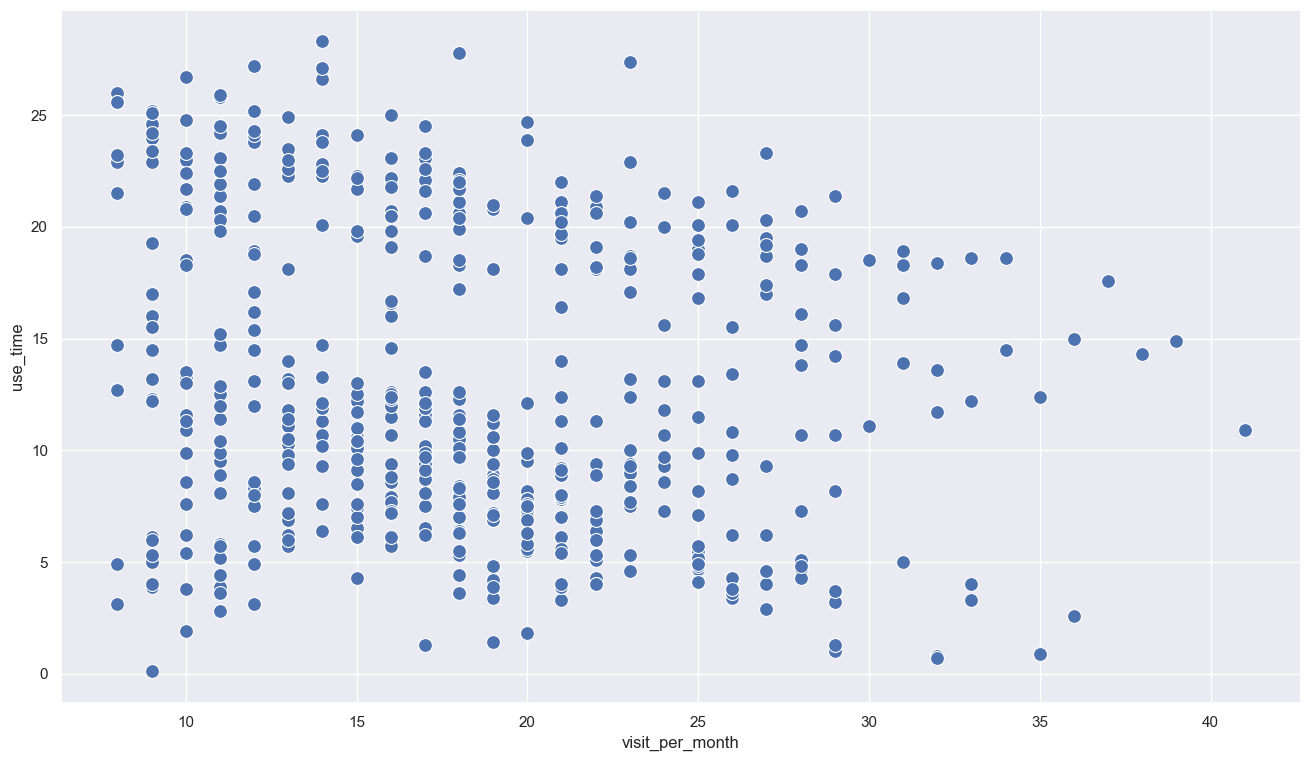

In [2]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize':(16, 9)})

# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')

In [3]:
# 클러스터링
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)
model.fit(user_activity)

# 클러스터 구분
user_activity['label'] = model.predict(user_activity)

# 클러스터별 속한 유저 수
user_activity.groupby('label').count()

,visit_per_month,use_time
label,,
0,229,229
1,121,121
2,150,150


<Axes: xlabel='visit_per_month', ylabel='use_time'>

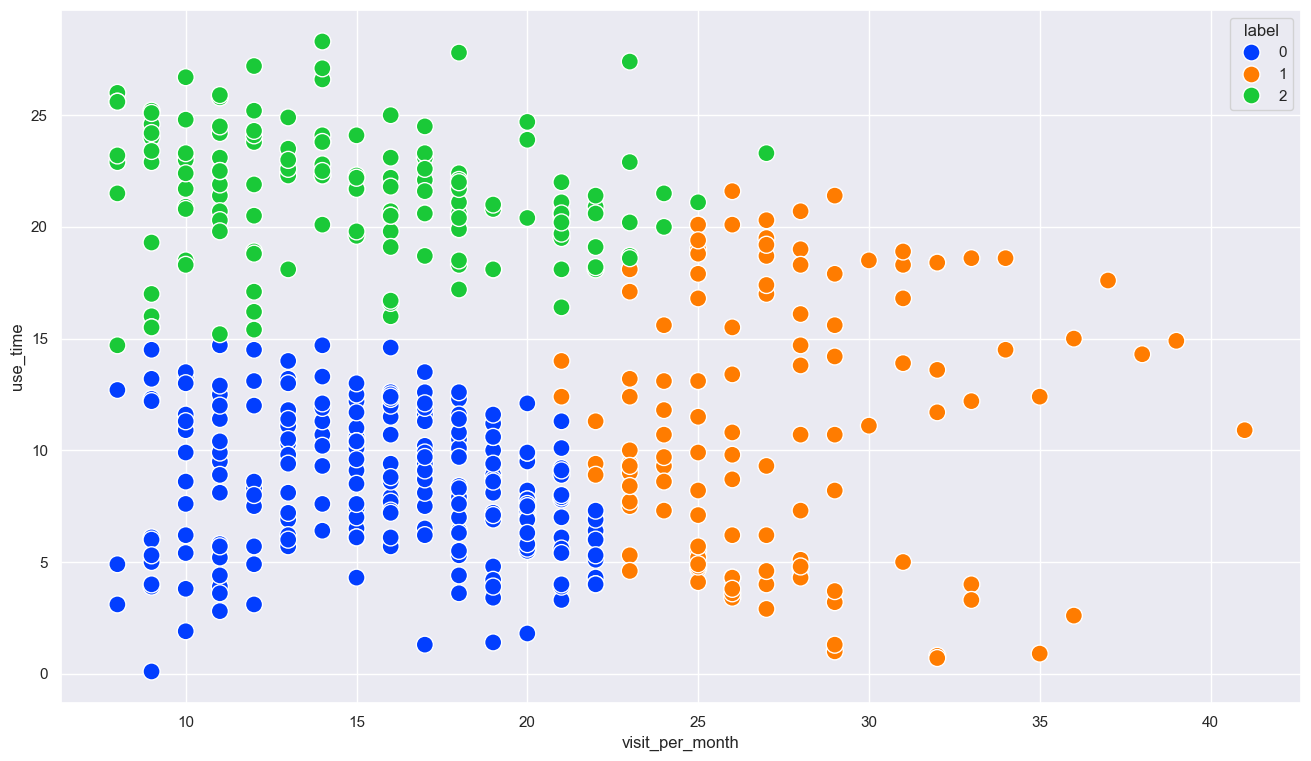

In [4]:
# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, hue=user_activity['label'], s = 150, palette='bright')